# 시계열분석

# 2장-3. Rolling & Expanding
- 매일 수집한 데이터들에게는 노이즈가 포함되기도 한다.
- 이럴 경우 데이터의 일반적인 트렌드를 구하기 위해 rolling mean(moving average)를 사용하기도 한다.
- rolling 함수를 이용하면 주어진 시한 내 평균 (rolling mean)을 구할 수 있음
- 임의 시간 간격의 window를 만들고 그 안에서 mean 같은 통계적 집계를 실행하면 된다.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime

---

## 03-1 데이터불러오기

In [2]:
# 자동 parsing 방법 -> parsing할 수 있는 컬럼이 발견되면 datetime으로 자동으로 바꾸어 준다.
## 리스트형식으로 parse_dates 중에 컬럼 정할 수 있다.

df = pd.read_csv('./data/apple_stock.csv', index_col='Date', parse_dates=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [4]:
# parser를 따로 만들수도 있다. (자동 parsing 안되는 데이터 처리 위해)
def dateparser(str_dt):
    return pd.datetime.strptime(str_dt, "%Y-%m-%d")

dateparser('2019-01-01')

datetime.datetime(2019, 1, 1, 0, 0)

In [6]:
# 위 함수 사용해서 다시 불러오기
df = pd.read_csv('./data/apple_stock.csv',
                 index_col='Date',
                 parse_dates=['Date'],
                 date_parser=dateparser)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


---

### 03-2. rolling 사용

In [10]:
# 7일치 데이터가 aggregation 된 것
# 앞 7개는 7개가 안되기 떄문에 missing이 일어난 것

df.rolling(7).mean().head(7)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,30.523878,30.071429,30.416122,30.260408,120970600.0,20.26427


<AxesSubplot:xlabel='Date'>

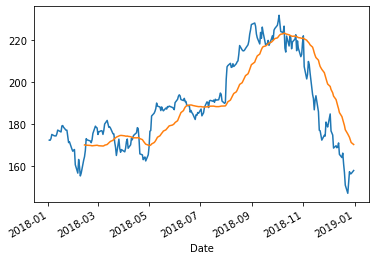

In [11]:
# 30일치 rolling 후 종가의 평균구하기
## 주황색이 30일치 트렌드(윈도우사이즈가 커질수록 트렌드를 못따라가게 된다.)

df['2018':]['Close'].plot()
df['2018':].rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

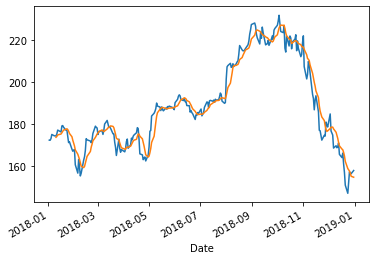

In [12]:
# 7일 rolling으로 바꾸면 trend 잘 따라가는 것 확인 가능

df['2018':]['Close'].plot()
df['2018':].rolling(window=7).mean()['Close'].plot()

In [13]:
# 새로운 컬럼 만들기
df['Close: 30 Day Mean'] = df['Close'].rolling(30).mean()

<AxesSubplot:xlabel='Date'>

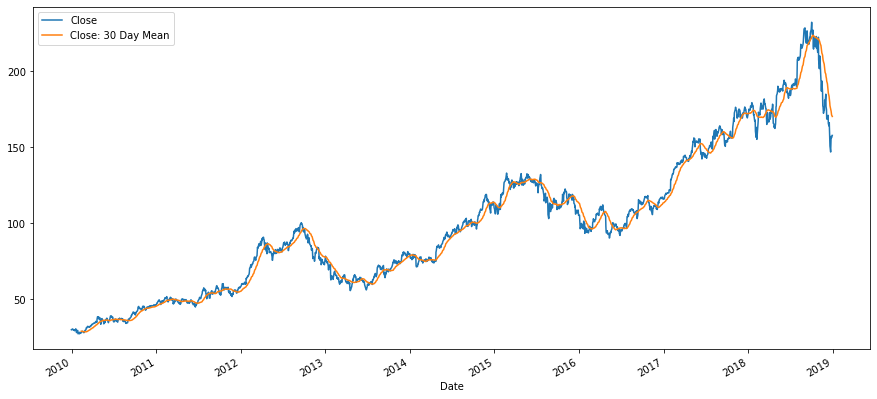

In [14]:
# 전체데이터와 비교
df[['Close','Close: 30 Day Mean']].plot(figsize=(15,7))

---

### 03-3 Expanding
- 고정된 시점에서 롤링하는 것이다.
- 잘 쓰이지 않음

<AxesSubplot:xlabel='Date'>

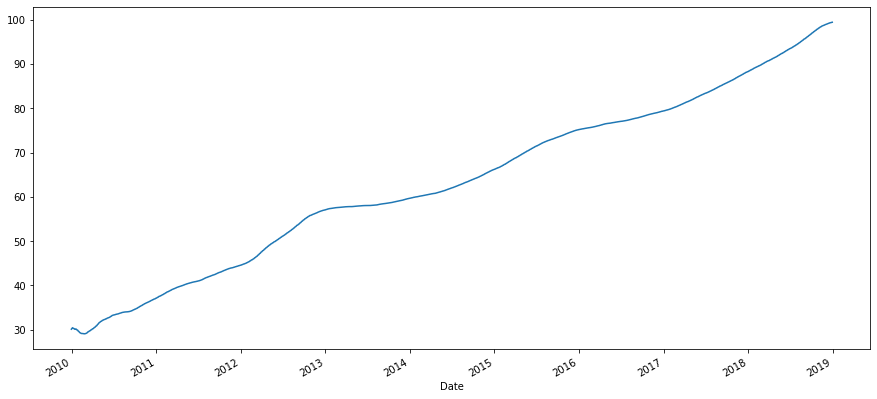

In [15]:
# 시점이 고정되어 있기에 계속늘어나기만 하는 것 확인가능
df['Close'].expanding(min_periods=1).mean().plot(figsize=(15,7))

---

### @ 볼린저밴드 그리기
- 20일치 트렌드를 보고 20일치의 트렌드보다 2std 위에 있으면 사야될 때이고, 내려가면 팔아야할 때 인 주식관련 그래프

In [16]:
df['Close: 20Day Mean'] = df['Close'].rolling(window=20).mean()
df['Upper'] = df['Close: 20Day Mean'].rolling(20).mean() + 2*df['Close'].rolling(window=20).std()
df['Lower'] = df['Close: 20Day Mean'].rolling(20).mean() - 2*df['Close'].rolling(window=20).std()

<AxesSubplot:xlabel='Date'>

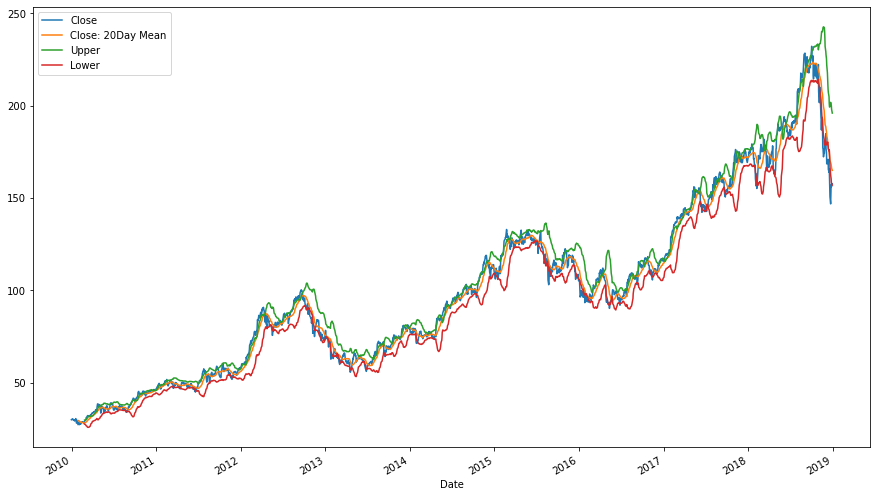

In [17]:
df[['Close','Close: 20Day Mean','Upper','Lower']].plot(figsize=(15,9))

<AxesSubplot:xlabel='Date'>

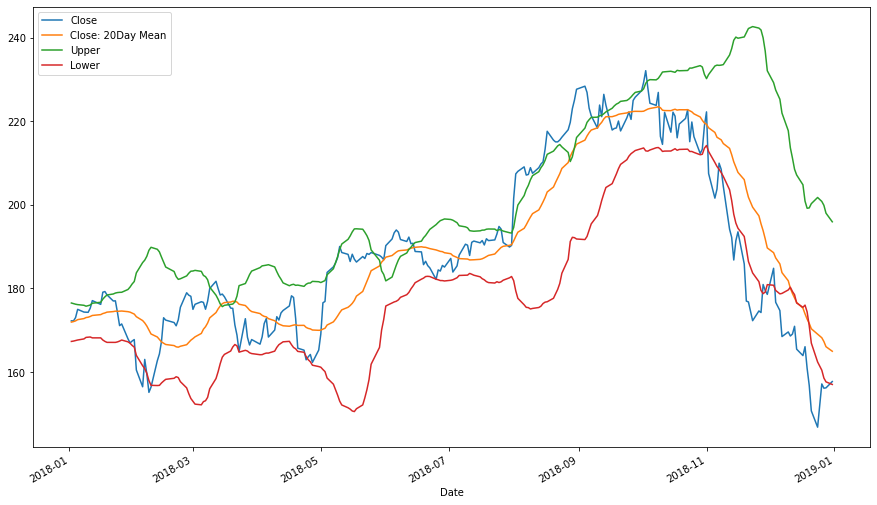

In [18]:
# 2018년부터의 볼린저밴드
df['2018':][['Close','Close: 20Day Mean','Upper','Lower']].plot(figsize=(15,9))